# Imports

**TODO ADD THIS TO REQUIREMENTS ?**


```
pip install --no-index matplotlib 
pip install --no-index scikit-learn
pip install --no-index seaborn
pip install fastprogress


pip install opencv-python
pip install lz4
````

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [26]:
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np

from fastprogress import progress_bar

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.__version__

'2.0.0'

In [13]:
import sys
sys.path.append("..") # Require to have the utilities packages in path
from utilities.utils import *

In [11]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

# Check data folder

In [9]:
!ls /project/cq-training-1/project1/data/

catalog.helios.public.20100101-20160101.pkl  dummy_test_cfg.json  hdf5v7_8bit
dummy_test_catalog.pkl			     hdf5v5_16bit	  netcdf


## Test dataframe data

In [14]:
data_path = Path(r"/project/cq-training-1/project1/data/")

In [15]:
df_dummy_test_catalog = pd.read_pickle(data_path/"dummy_test_catalog.pkl")
df_dummy_test_catalog.shape

(35040, 19)

In [20]:
df_dummy_test_catalog.head()

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,TBL_DAYTIME,TBL_CLEARSKY_GHI,DRA_DAYTIME,DRA_CLEARSKY_GHI,FPK_DAYTIME,FPK_CLEARSKY_GHI,GWN_DAYTIME,GWN_CLEARSKY_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,64,/project/cq-training-1/project1/data/hdf5v5_16...,64,0,0.0,0,0.0,1,52.262615,0,0.0,0,0.0,0,0.0,0,0.0
2015-01-01 00:15:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,65,/project/cq-training-1/project1/data/hdf5v5_16...,65,0,0.0,0,0.0,1,18.440082,0,0.0,0,0.0,0,0.0,0,0.0
2015-01-01 00:30:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,66,/project/cq-training-1/project1/data/hdf5v5_16...,66,0,0.0,0,0.0,1,1.445237,0,0.0,0,0.0,0,0.0,0,0.0
2015-01-01 00:45:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,67,/project/cq-training-1/project1/data/hdf5v5_16...,67,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0
2015-01-01 01:00:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,68,/project/cq-training-1/project1/data/hdf5v5_16...,68,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0


## Train dataframe

Github project documentation link

https://github.com/mila-iqia/ift6759/blob/master/projects/project1/dataframe.md

In [15]:
df_train_catalog = pd.read_pickle(data_path/"catalog.helios.public.20100101-20160101.pkl")
df_train_catalog.shape

(210336, 33)

In [19]:
df_train_catalog.head()

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,nan,nan,NaN,nan,NaN,0,0.0,night,-4.1,0,...,night,-7.500000,0,0.0,night,-1.500000,0,0.0,night,-3.800000
2010-01-01 00:15:00,nan,nan,NaN,nan,NaN,0,0.0,night,-4.1,0,...,night,-7.493333,0,0.0,night,-1.446667,0,0.0,night,-3.893333
2010-01-01 00:30:00,nan,nan,NaN,nan,NaN,0,0.0,night,-4.1,0,...,night,-7.420000,0,0.0,night,-1.766667,0,0.0,night,-4.166667
2010-01-01 00:45:00,nan,nan,NaN,nan,NaN,0,0.0,night,-4.1,0,...,night,-7.533333,0,0.0,night,-2.033333,0,0.0,night,-4.040000
2010-01-01 01:00:00,nan,nan,NaN,nan,NaN,0,0.0,night,-4.1,0,...,night,-7.586667,0,0.0,night,-2.006667,0,0.0,night,-4.133333


# EDA

## Check general temporal structure of GHI data w.r.t. stations

Inspiration https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions

In [34]:
stations = ["BND", "TBL", "DRA", "FPK", "GWN", "PSU"]

In [35]:
df_train_catalog_day = df_train_catalog.groupby(pd.Grouper(freq='D')).mean()#.reset_index()

Text(0, 0.5, 'GHI')

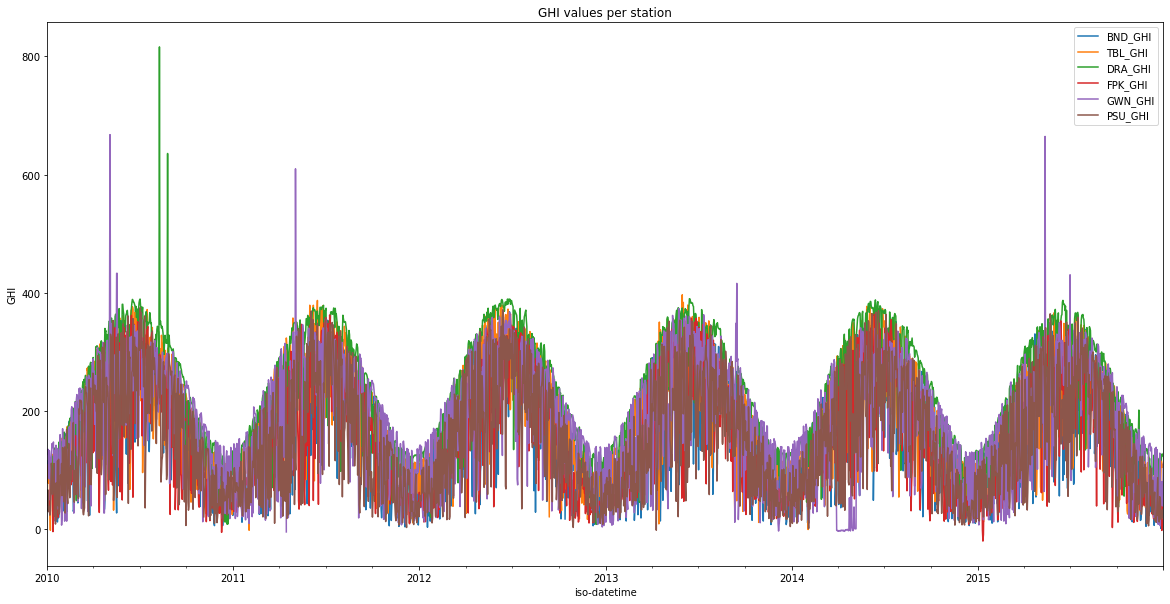

In [46]:
data = df_train_catalog_day[[s + "_GHI" for s in stations]]
ax = data.plot(figsize=(20, 10), title="GHI daily mean values per station")#.hist(subplots=True, legend=True, figsize=(10, 10))
ax.set_ylabel("GHI")

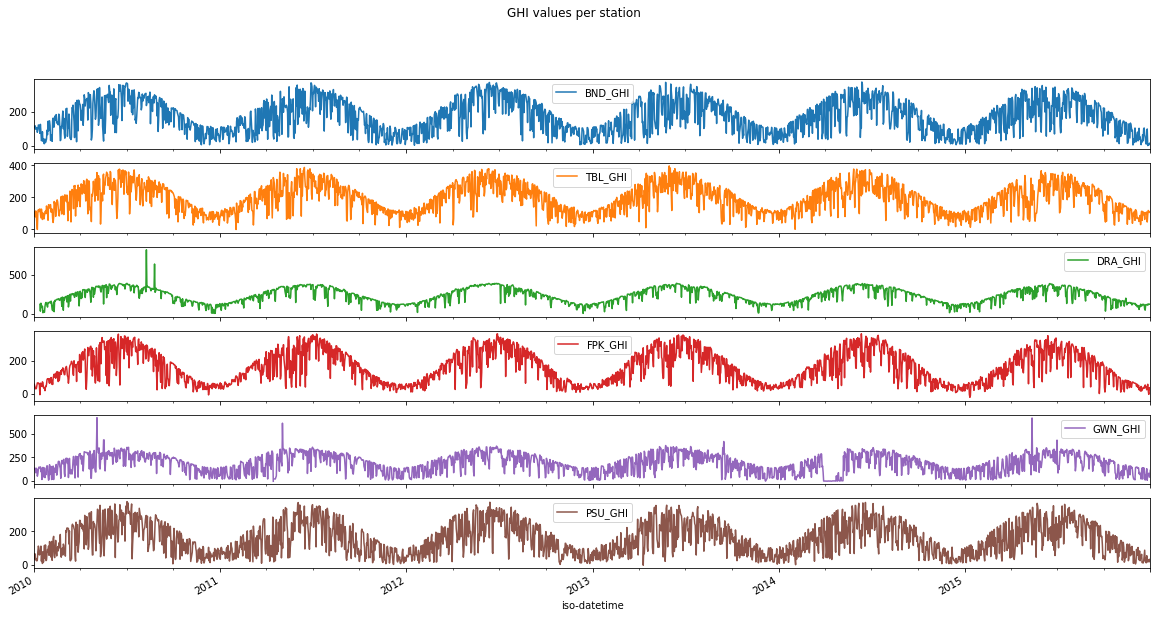

In [50]:
data = df_train_catalog_day[[s + "_GHI" for s in stations]]
ax = data.plot(subplots=True, layout=(len(data.columns), 1), figsize=(20, 10), title="GHI daily mean values per station")

In [53]:
list(range(2010, 2015))

[2010, 2011, 2012, 2013, 2014]

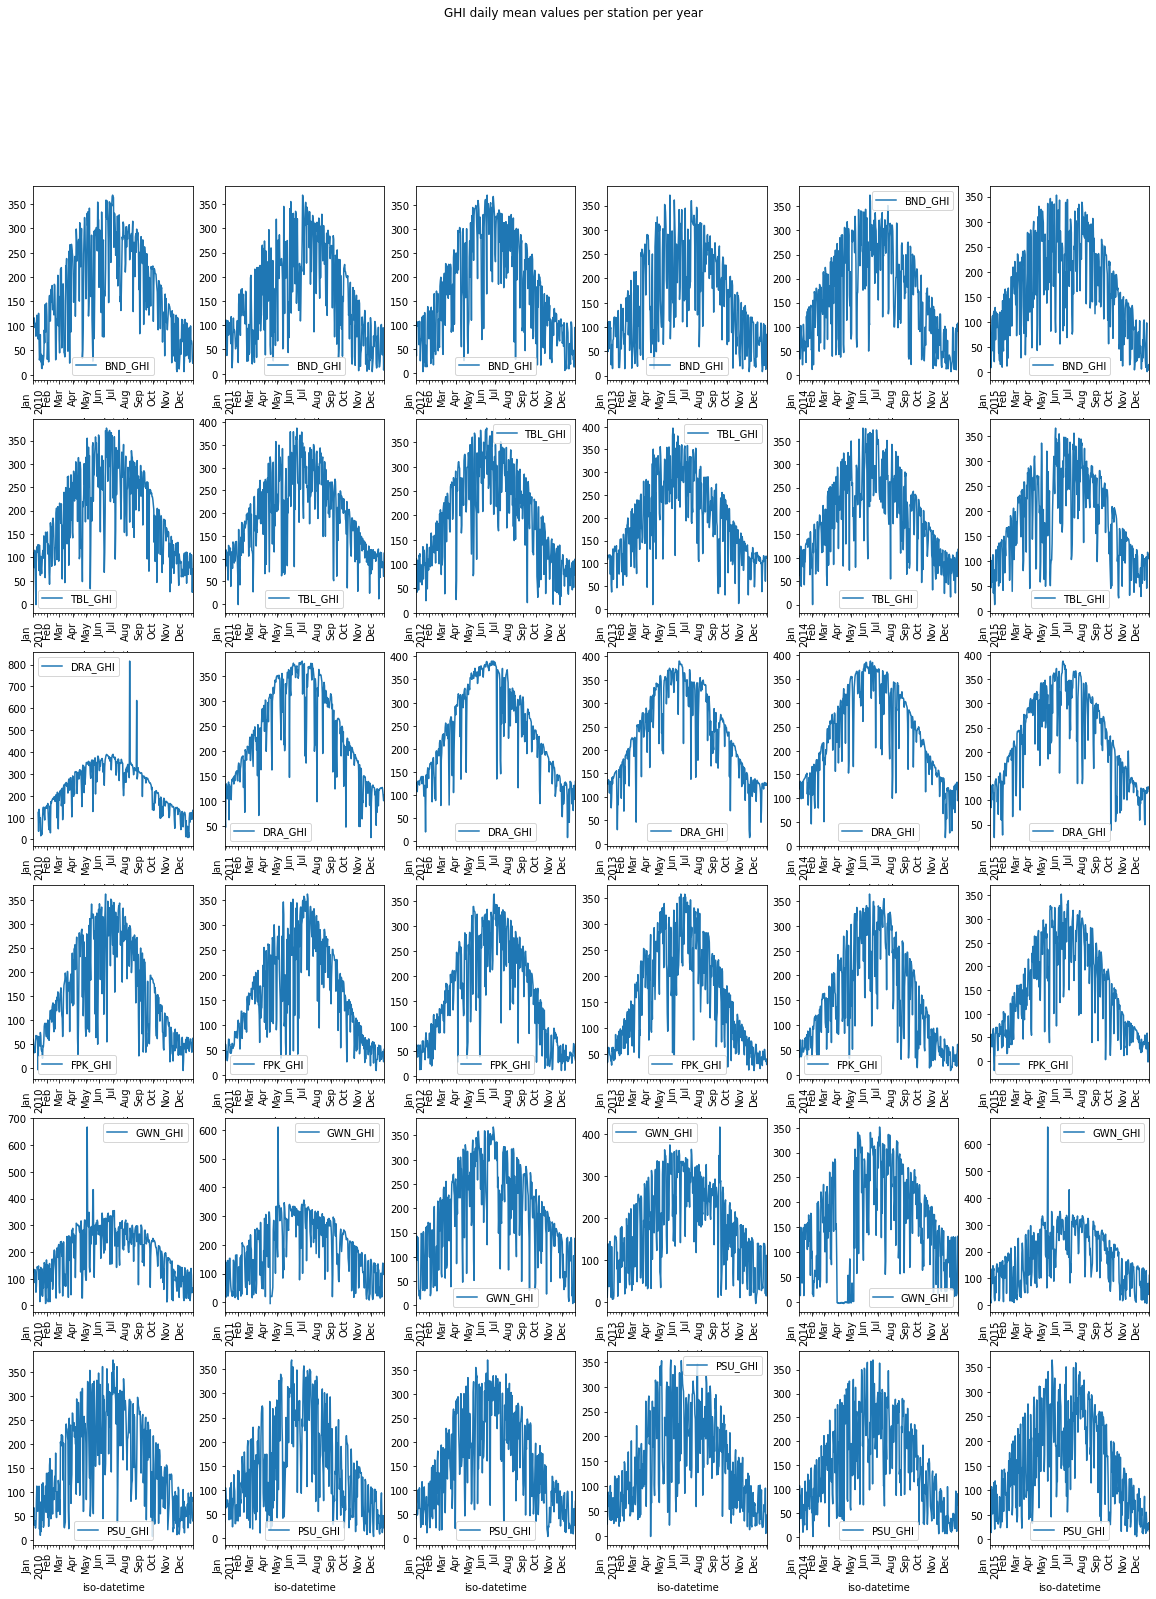

In [237]:
period = list(range(2010, 2016))

fig, axes = plt.subplots(nrows=len(stations), ncols=len(period), figsize=(20, 25))
fig.suptitle("GHI daily mean values per station per year")


for i, s in enumerate([s + "_GHI" for s in stations]):
    for j, year in enumerate(period):
        ax = df_train_catalog_day.loc[df_train_catalog_day.index.year == year, [s]].plot(ax=axes[i,j], rot=90)

In [176]:
df_train_catalog[[s + "_GHI" for s in stations]].min()

BND_GHI    -7.006667
TBL_GHI    -9.513333
DRA_GHI   -12.473333
FPK_GHI   -30.000000
GWN_GHI   -15.713333
PSU_GHI    -8.553333
dtype: float64

-30.000000000089443


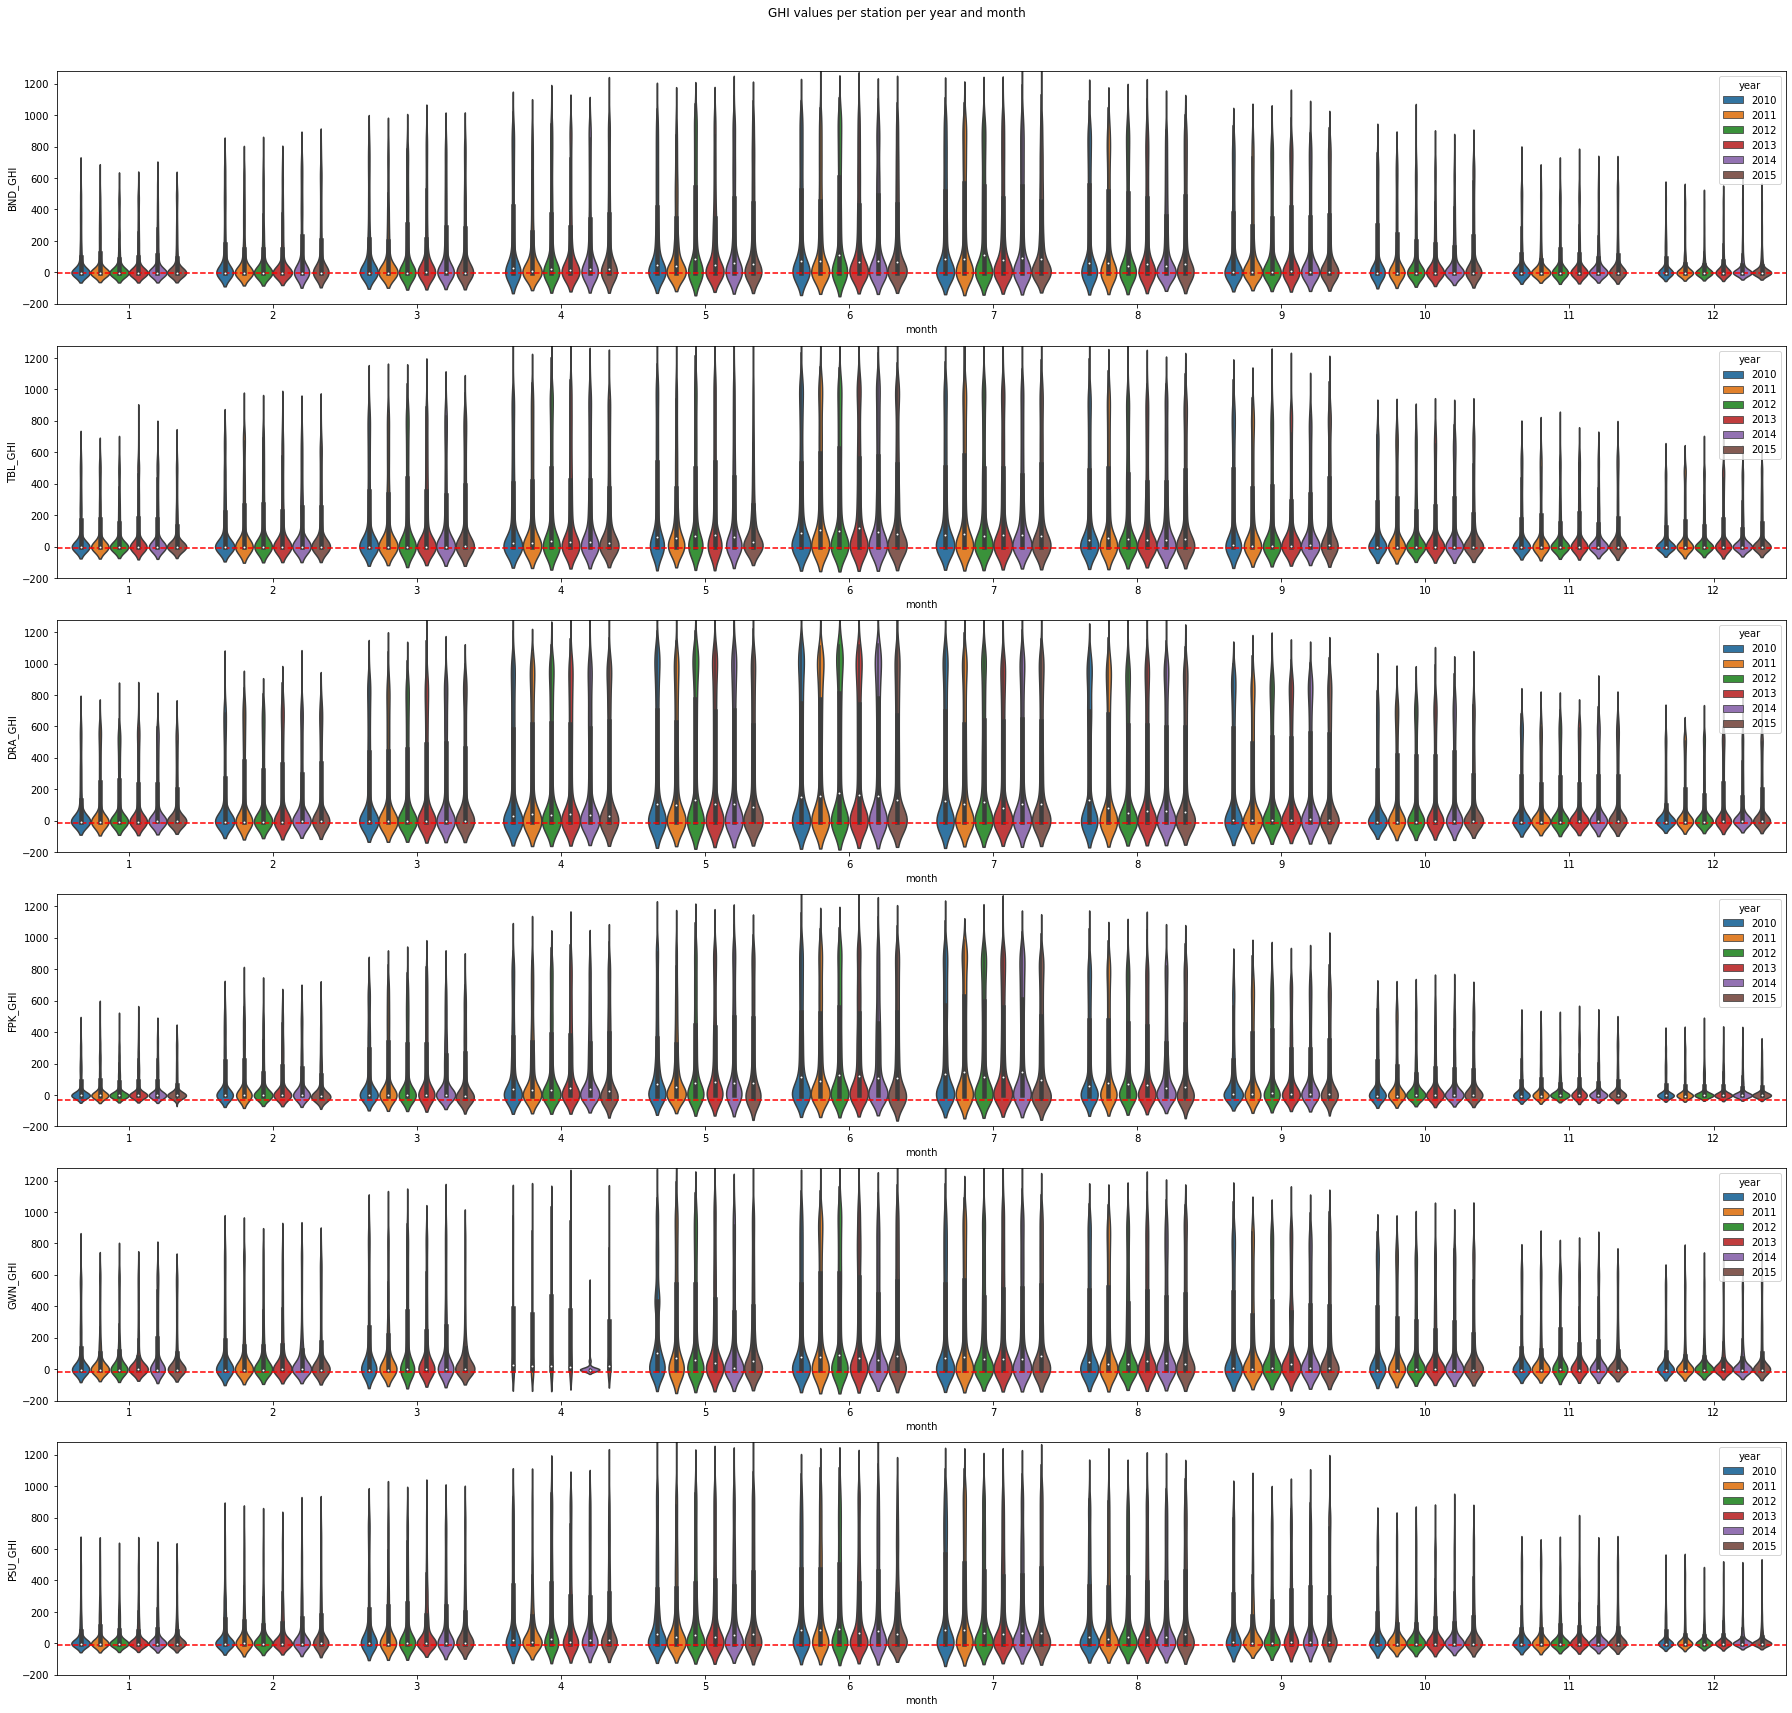

In [182]:
fig, axes = plt.subplots(nrows=len(stations), ncols=1, figsize=(25, 25))
fig.suptitle("GHI values per station per year and month")

min_df, max_df = df_train_catalog[[s + "_GHI" for s in stations]].min().min(), df_train_catalog[[s + "_GHI" for s in stations]].max().max()
print(min_df)

count = 0
for i, s in enumerate([s + "_GHI" for s in stations]):
    data = df_train_catalog
    data = data.assign(month=data.index.month, year=data.index.year)

    ax = sns.violinplot(data=data, x="month", y=s, hue="year", ax=axes[count])
    axes[count].set_ylim(bottom=-200, top=max_df)
    axes[count].axhline(y=data[s].min(), color="r", linestyle="--")
    count += 1
    
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [192]:
for s in stations:
    min_df = df_train_catalog.loc[df_train_catalog[s + "_DAYTIME"] == True, s + "_GHI"].min()
    max_df = df_train_catalog.loc[df_train_catalog[s + "_DAYTIME"] == True, s + "_GHI"].max()
    print(s, min_df, max_df)

BND -5.673333333328555 1193.3266666666584
TBL -7.6799999999755615 1278.5533333333487
DRA -8.52000000000144 1276.5933333333423
FPK -29.200000000033352 1159.113333333334
GWN -7.293333333328736 1206.506666666674
PSU -4.8466666666621725 1200.840000000019


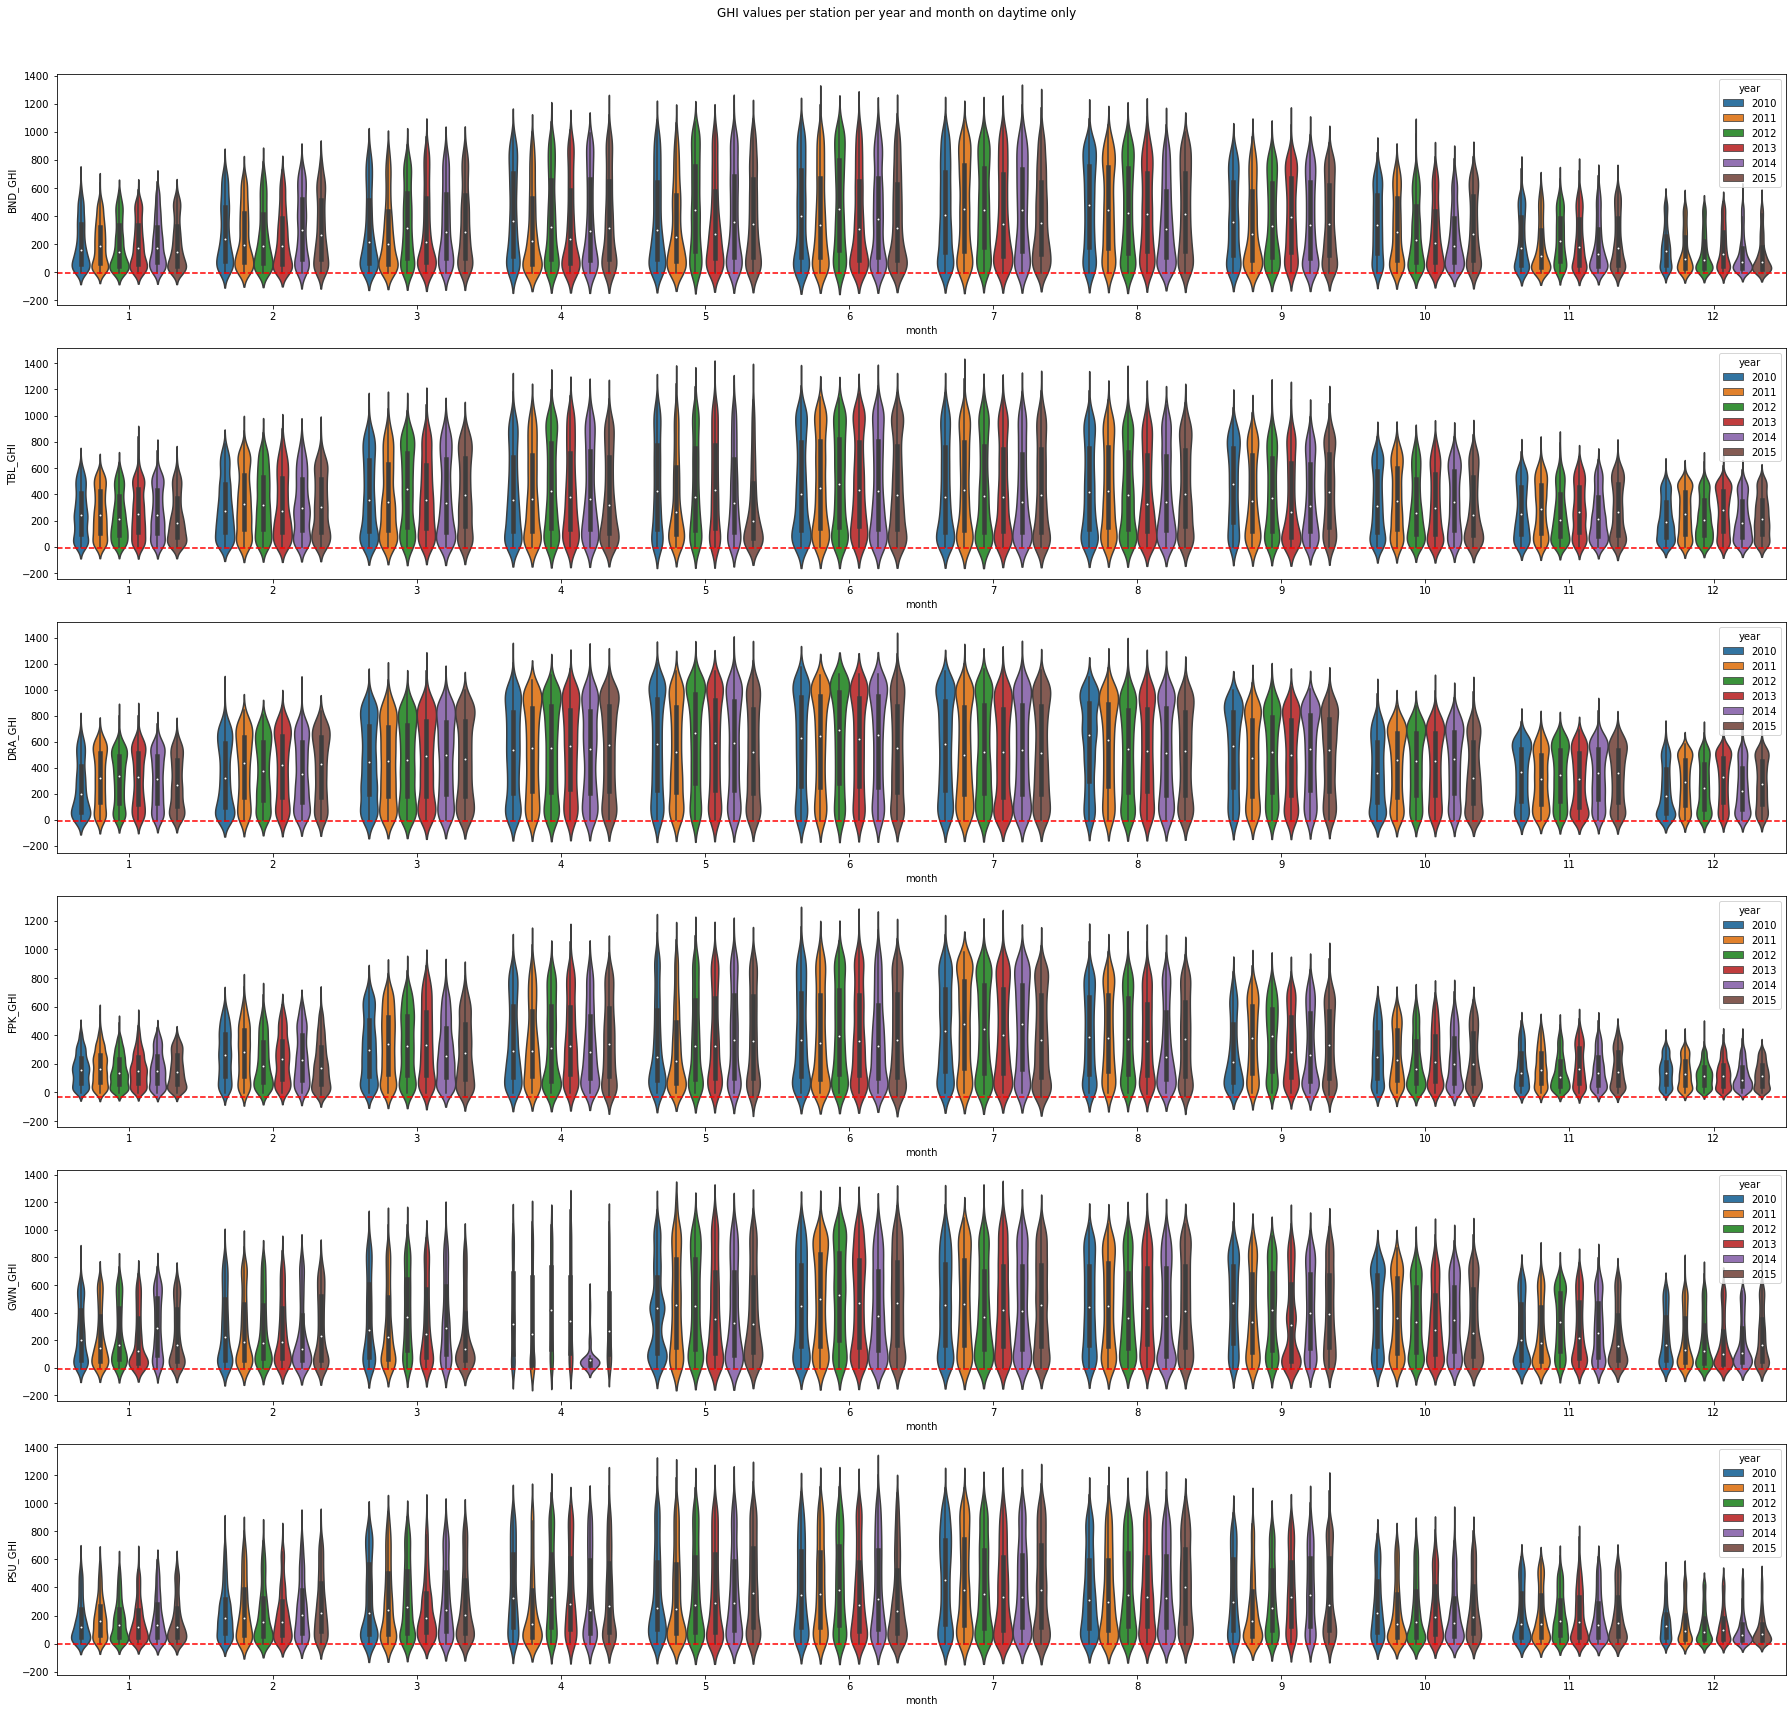

In [191]:
fig, axes = plt.subplots(nrows=len(stations), ncols=1, figsize=(25, 25))
fig.suptitle("GHI values per station per year and month on daytime only")


count = 0
for i, s in enumerate(stations):
    data = df_train_catalog.loc[df_train_catalog[s + "_DAYTIME"] == True, :]
    data = data.assign(month=data.index.month, year=data.index.year)

    ax = sns.violinplot(data=data, x="month", y=s + "_GHI", hue="year", ax=axes[count])
#    axes[count].set_ylim(bottom=-200, top=max_df)
    axes[count].axhline(y=data[s + "_GHI"].min(), color="r", linestyle="--")
    count += 1
    
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Check distribution of missing data wrt time

Note: Missing is only at observation level (i.e. timestamp)

In [259]:
df = df_train_catalog
df = df.assign(year=df.index.year, month=df.index.month, missing=df["ncdf_path"] == "nan")
print("% Missing data over total observations", df.missing.mean())



% Missing data over total observations 0.17409763426137229


In [260]:
pivot = df.groupby(["year", "month", "missing"]).size() / df.shape[0]
pivot = pivot.reset_index().rename({0: "pct"}, axis=1)
pivot[pivot.missing].sort_values(by="pct", ascending=False)[:5]

,year,month,missing,pct
0,2010,1,True,0.014149
2,2010,3,True,0.014149
1,2010,2,True,0.012780
64,2012,10,True,0.008681
4,2010,4,True,0.007288


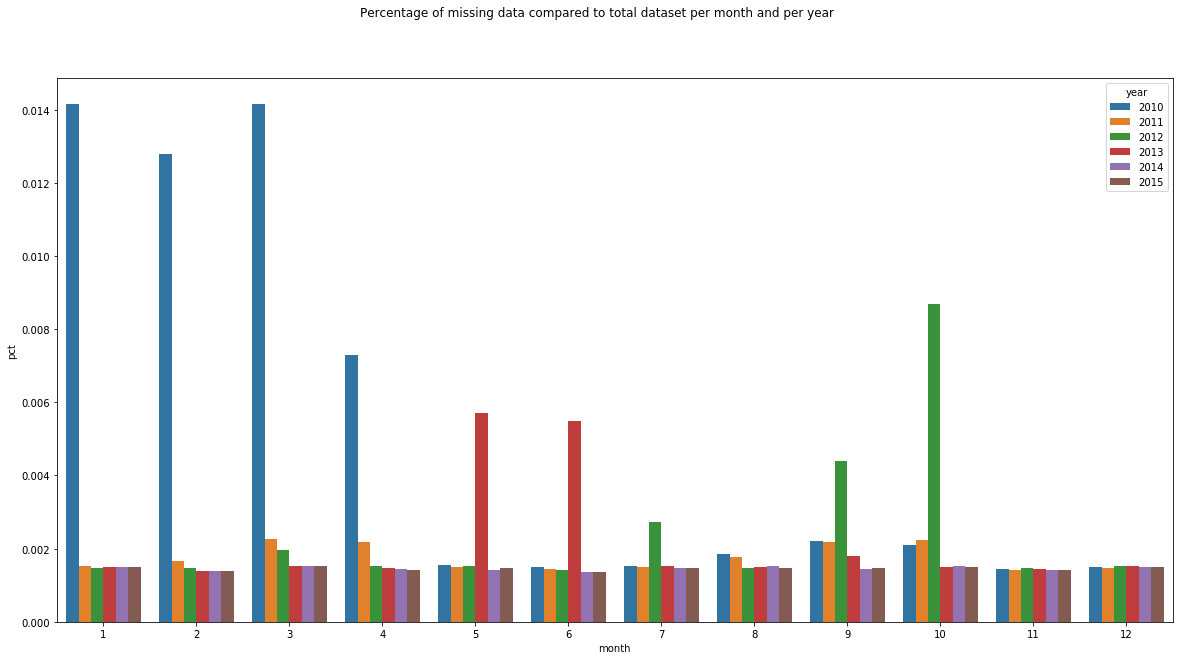

In [258]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Percentage of missing data compared to total dataset per month and per year")

ax = sns.barplot(data=pivot[pivot.missing], x="month", y="pct", hue="year")

# Conclusion so far on GHI data

GHI
- Yearly seasonality (according to season)
- Trends accross time period look quite stationary
- Some outliers, especially for DRA and GWN stations
- Low volatility for DRA station and high volatility for BND ,PSU and TBL stations
- GWN seem to have been disconnected during April and May 2014
- Distribution for GWI is highly skewed by keeping observation during nightime
- Minimum values are still negative even during daytime, and roughly the same with negative values
- FPK has got a lower minimum value compared to others
- The volatility is higher during summer period than other seasons
- Distribution doesn't change much accros year for all stations except GWI for April 2014


Missing data
- Quite a fair amount of missing data: **17%** of total observations
- Some specific months with higher missing data (but not fixed pattern accross year) 



## Check metadata

In [16]:
df = df_train_catalog[["ncdf_path", "hdf5_8bit_path", 
                  "hdf5_16bit_path"]].replace("nan", np.nan)

In [17]:
mask = df.isnull().all(1)
print("number of row with no image at all:", mask.sum())

number of row with no image at all: 32


In [18]:
df[mask]

,ncdf_path,hdf5_8bit_path,hdf5_16bit_path
iso-datetime,,,
2010-01-01 00:00:00,NaN,NaN,NaN
2010-01-01 00:15:00,NaN,NaN,NaN
2010-01-01 00:30:00,NaN,NaN,NaN
2010-01-01 00:45:00,NaN,NaN,NaN
2010-01-01 01:00:00,NaN,NaN,NaN
2010-01-01 01:15:00,NaN,NaN,NaN
2010-01-01 01:30:00,NaN,NaN,NaN
2010-01-01 01:45:00,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN


In [19]:
mask = df.isnull().any(1)
print("number of row with at least one missing image:", mask.sum())

number of row with at least one missing image: 36619


In [20]:
df_train_catalog[mask]

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,TBL_CLEARSKY_GHI,TBL_CLOUDINESS,TBL_GHI,DRA_DAYTIME,DRA_CLEARSKY_GHI,DRA_CLOUDINESS,DRA_GHI,FPK_DAYTIME,FPK_CLEARSKY_GHI,FPK_CLOUDINESS,FPK_GHI,GWN_DAYTIME,GWN_CLEARSKY_GHI,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,nan,nan,NaN,nan,NaN,0,0.000000,night,-4.100000,0,0.000000,night,-3.600000,1,52.706473,cloudy,NaN,0,0.000000,night,-3.100000,0,0.000000,night,-7.500000,0,0.000000,night,-1.500000,0,0.000000,night,-3.800000
2010-01-01 00:15:00,nan,nan,NaN,nan,NaN,0,0.000000,night,-4.100000,0,0.000000,night,-5.353333,1,18.742351,cloudy,NaN,0,0.000000,night,-2.833333,0,0.000000,night,-7.493333,0,0.000000,night,-1.446667,0,0.000000,night,-3.893333
2010-01-01 00:30:00,nan,nan,NaN,nan,NaN,0,0.000000,night,-4.100000,0,0.000000,night,-5.180000,1,1.518621,cloudy,NaN,0,0.000000,night,-2.546667,0,0.000000,night,-7.420000,0,0.000000,night,-1.766667,0,0.000000,night,-4.166667
2010-01-01 00:45:00,nan,nan,NaN,nan,NaN,0,0.000000,night,-4.100000,0,0.000000,night,-5.213333,0,0.000000,night,NaN,0,0.000000,night,-2.433333,0,0.000000,night,-7.533333,0,0.000000,night,-2.033333,0,0.000000,night,-4.040000
2010-01-01 01:00:00,nan,nan,NaN,nan,NaN,0,0.000000,night,-4.100000,0,0.000000,night,-5.133333,0,0.000000,night,NaN,0,0.000000,night,-2.693333,0,0.000000,night,-7.586667,0,0.000000,night,-2.006667,0,0.000000,night,-4.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 12:00:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,16,/project/cq-training-1/project1/data/hdf5v5_16...,16,0,0.000000,night,-3.060000,0,0.000000,night,-1.673333,0,0.000000,night,-4.900000,0,0.000000,night,-3.900000,0,0.000000,night,-2.726667,0,0.000000,night,-1.300000,0,0.000000,night,-2.173333
2015-12-31 15:00:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,28,/project/cq-training-1/project1/data/hdf5v5_16...,28,1,216.974864,cloudy,31.166667,1,43.276733,slightly cloudy,20.460000,1,0.226467,cloudy,-0.673333,1,0.738429,cloudy,4.446667,1,263.720195,slightly cloudy,240.180000,1,304.393579,cloudy,34.786667,1,78.970039,cloudy,NaN
2015-12-31 15:30:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,30,/project/cq-training-1/project1/data/hdf5v5_16...,30,1,287.030497,cloudy,71.766667,1,123.205521,variable,52.593333,1,42.384954,slightly cloudy,37.280000,1,28.269562,variable,26.593333,1,341.219270,slightly cloudy,318.333333,1,359.318917,cloudy,29.373333,1,147.388023,cloudy,NaN


In [31]:
df = df_train_catalog[mask & ~df.hdf5_8bit_path.isnull()]

In [32]:
sample_missing_ncdf_with_hdf5 = df.sample(n=1, random_state=42)
sample_missing_ncdf_with_hdf5 = sample_missing_ncdf_with_hdf5.iloc[0, :]
sample_missing_ncdf_with_hdf5

ncdf_path                                                          nan
hdf5_8bit_path       /project/cq-training-1/project1/data/hdf5v7_8b...
hdf5_8bit_offset                                                    28
hdf5_16bit_path      /project/cq-training-1/project1/data/hdf5v5_16...
hdf5_16bit_offset                                                   28
BND_DAYTIME                                                          1
BND_CLEARSKY_GHI                                                 704.6
BND_CLOUDINESS                                                variable
BND_GHI                                                        351.925
TBL_DAYTIME                                                          1
TBL_CLEARSKY_GHI                                               605.072
TBL_CLOUDINESS                                         slightly cloudy
TBL_GHI                                                          616.5
DRA_DAYTIME                                                          1
DRA_CL

In [33]:
sample_missing_ncdf_with_hdf5.hdf5_8bit_path

'/project/cq-training-1/project1/data/hdf5v7_8bit/2015.05.29.0800.h5'

In [34]:
with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "r") as h5_data:
    ch1_data = fetch_hdf5_sample("ch1", h5_data, sample_missing_ncdf_with_hdf5.hdf5_8bit_offset)

In [35]:
type(ch1_data)

NoneType

In [37]:
with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "r") as h5_data:
    ch1_data = fetch_hdf5_sample("ch5", h5_data, sample_missing_ncdf_with_hdf5.hdf5_8bit_offset)

KeyError: "Unable to open object (object 'ch5' doesn't exist)"

In [40]:
# Check if all rows without ncdf image contain dummy hdf5 data

for i in progress_bar(range(df.shape[0])):
    sample_missing_ncdf_with_hdf5 = df.iloc[i, :]
    for channel  in range(1, 7):
        if channel == 5: continue
        with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "r") as h5_data:
            ch_data = fetch_hdf5_sample("ch" + str(channel), 
                                        h5_data, sample_missing_ncdf_with_hdf5.hdf5_8bit_offset)
            if ch_data is not None:
                print("8bit image i", i, "path", sample_missing_ncdf_with_hdf5.hdf5_8bit_path, "is incoherent")
        with h5py.File(sample_missing_ncdf_with_hdf5.hdf5_16bit_path, "r") as h5_data:
            ch_data = fetch_hdf5_sample("ch" + str(channel), 
                                        h5_data, sample_missing_ncdf_with_hdf5.hdf5_16bit_offset)
            if ch_data is not None:
                print("16bit image i", i, "path", sample_missing_ncdf_with_hdf5.hdf5_16bit_path, "is incoherent")

# Conclusion so far on images

Random
- Some packages are required to use utils.py (cv2, tqdm, lz4)

Missing data
- Field ncdf_path has got nan as string instead of np.nan
- Some hdf5 files but no ncdf file
    
    it appears that it may be still incomplete
- You cannot load channel 5 in utils.py